In [1]:
import math
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss

import warnings
warnings.filterwarnings('ignore')

# Q 1: Stationarity

## 1.A

- There are 4 variables in the dataset: one measure for time (object) and 3 floats variables. 
- There are no missing values
- The ACF tests are showing that autocorrelation is present for all the variables, that it is strong and for many lags
- The time series plot shows that the three floats variables share same patterns in terms of trend (increase over time), and seasonality and cycles (seems not to not have patterns within a year or gratergreater periods)

In [2]:
df = pd.read_csv('hw1_data.csv')
df.head()

,Date,IWM,QQQ,SPY
0,2000-05-26,34.800865,67.670738,93.363678
1,2000-05-30,36.085365,74.470436,96.408173
2,2000-05-31,36.216213,72.348938,96.619591
3,2000-06-01,37.036850,76.048004,98.310966
4,2000-06-02,38.963646,81.487755,100.023491


In [3]:
df.describe()

,IWM,QQQ,SPY
count,4972.000000,4972.000000,4972.000000
mean,77.254619,70.539066,134.360431
std,38.722995,49.057235,66.778492
min,25.456144,17.459492,53.503864
25%,46.092833,34.344567,85.923027
50%,63.785954,48.595505,105.741215
75%,106.390139,99.085045,180.474552
max,167.320114,235.638428,332.137360


In [4]:
df.isnull().sum()

Date    0
IWM     0
QQQ     0
SPY     0
dtype: int64

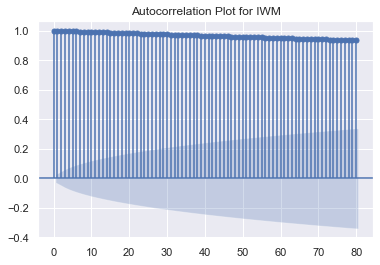

In [5]:
acf_plot_iwm = plot_acf(df['IWM'], lags=80, title='Autocorrelation Plot for IWM')

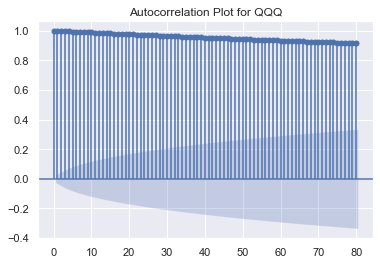

In [6]:
acf_plot_qqq = plot_acf(df['QQQ'], lags=80, title='Autocorrelation Plot for QQQ')

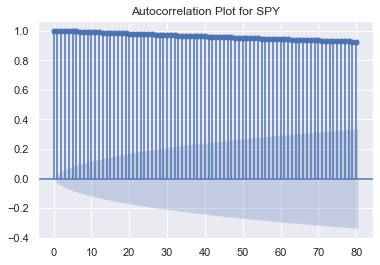

In [7]:
acf_plot_spy = plot_acf(df['SPY'], lags=80, title='Autocorrelation Plot for SPY')

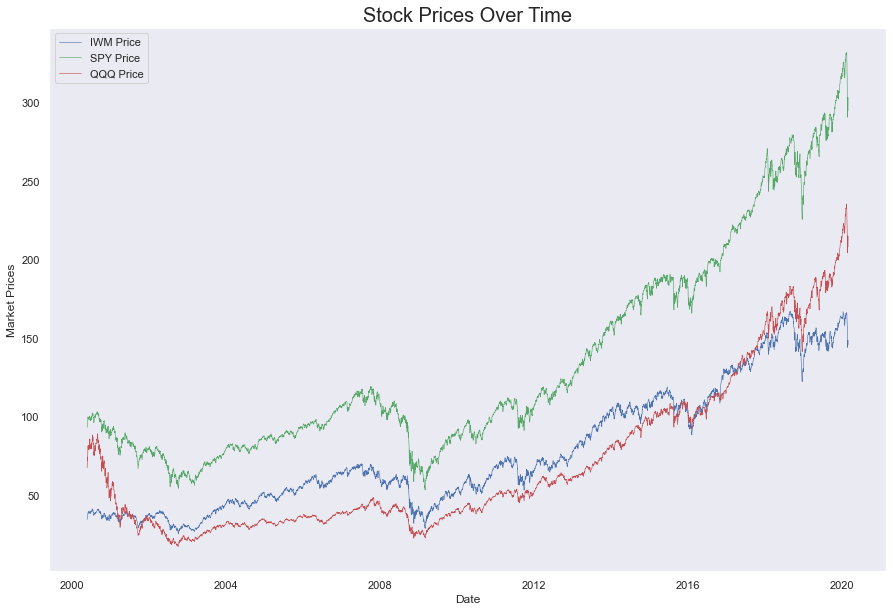

In [8]:
x = df['Date']
x = pd.to_datetime(x)

y = df['IWM']
z = df['SPY']
v = df['QQQ']

plt.figure(figsize=(15,10))  
plt.plot(x, y, color = 'b',label = "IWM Price", ls = '-', lw = 0.6)
plt.plot(x, z, color = 'g',label = "SPY Price", ls = '-', lw = 0.6)
plt.plot(x, v, color = 'r',label = "QQQ Price", ls = '-', lw = 0.6)

plt.xlabel('Date')
plt.ylabel('Market Prices')
plt.title('Stock Prices Over Time', fontsize = 20)
plt.grid()
plt.legend()
plt.show()


## 1B

Based on the plot above, we can state that the floats covariates seems to just be wandering around, which means that it is likely that they have a random walk time series instead of a stationary one. They are not reverting to a mean. This make sense given the nature of the variables: they are stock prices.

## 1C

In [9]:
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy

alpha = 0.05

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries, trend='c'):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)    

## 1D

- **ADF tests** are showing that the p-values are greater than 0.05. This means that the **Null Hypothesis of non-stationarity cannot be rejected**.

- **KPSS tests** are showing that the p-values are smaller than 0.05. This means that the **Null Hypothesis of **stationarity in the time series can be rejected**.

### ADF tests

In [10]:
adf_test(df['SPY'])

Results of Dickey-Fuller Test:
Test Statistic                    1.575206
p-value                           0.997781
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64


In [11]:
adf_test(df['QQQ'])

Results of Dickey-Fuller Test:
Test Statistic                    2.525983
p-value                           0.999058
#Lags Used                       31.000000
Number of Observations Used    4940.000000
Critical Value (1%)              -3.431674
Critical Value (5%)              -2.862125
Critical Value (10%)             -2.567082
dtype: float64


In [12]:
adf_test(df['IWM'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.148096
p-value                           0.944432
#Lags Used                       17.000000
Number of Observations Used    4954.000000
Critical Value (1%)              -3.431671
Critical Value (5%)              -2.862124
Critical Value (10%)             -2.567081
dtype: float64


### KPSS tests 

In [13]:
kpss_test(df['SPY'])

Results of KPSS Test:
Test Statistic           12.14194
p-value                   0.01000
Lags Used                32.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [14]:
kpss_test(df['QQQ'])

Results of KPSS Test:
Test Statistic           11.379166
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [15]:
kpss_test(df['IWM'])

Results of KPSS Test:
Test Statistic           13.164847
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


### Reporting results

### ADF

In [16]:
adf_spy = adfuller(df['SPY'])
adf_spy_pval = adf_spy[1]

if adf_spy_pval < 0.05:
    print('We can reject the Null Hypothesis of non-stationarity')
else:
    print('We cannot reject the Null Hypothesis of non-stationarity')

We cannot reject the Null Hypothesis of non-stationarity


In [17]:
adf_qqq = adfuller(df['QQQ'])
adf_qqq_pval = adf_qqq[1]

if adf_qqq_pval < 0.05:
    print('We can reject the Null Hypothesis of non-stationarity')
else:
    print('We cannot reject the Null Hypothesis of non-stationarity')

We cannot reject the Null Hypothesis of non-stationarity


In [18]:
adf_iwm = adfuller(df['IWM'])
adf_iwm_pval = adf_iwm[1]

if adf_iwm_pval < 0.05:
    print('We can reject the Null Hypothesis of non-stationarity')
else:
    print('We cannot reject the Null Hypothesis of non-stationarity')

We cannot reject the Null Hypothesis of non-stationarity


### KPSS

In [19]:
kpss_spy = kpss(df['SPY'])
kpss_pval_spy = kpss_spy[1]

if kpss_pval_spy <= 0.05:
    print('We can reject the Null Hypothesis of stationarity')
else:
    print('We cannot reject the Null Hypothesis of stationarity')

We can reject the Null Hypothesis of stationarity


In [20]:
kpss_qqq = kpss(df['QQQ'])
kpss_pval_qqq = kpss_qqq[1]

if kpss_pval_qqq <= 0.05:
    print('We can reject the Null Hypothesis of stationarity')
else:
    print('We cannot reject the Null Hypothesis of stationarity')

We can reject the Null Hypothesis of stationarity


In [21]:
kpss_iwm = kpss(df['IWM'])
kpss_pval_iwm = kpss_iwm[1]

if kpss_pval_iwm <= 0.05:
    print('We can reject the Null Hypothesis of stationarity')
else:
    print('We cannot reject the Null Hypothesis of stationarity')

We can reject the Null Hypothesis of stationarity


## 1E

We can check for stationarity in the presence of a deterministic trend. We can see that the time series get stationary once we run the difference versus one lag period, as follows:

<AxesSubplot:>

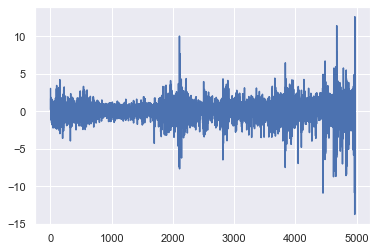

In [22]:
dif_spy = (df['SPY'] - df['SPY'].shift()).iloc[1:]
dif_spy.plot()

<AxesSubplot:>

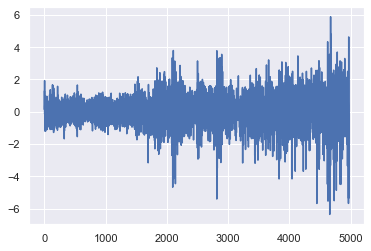

In [23]:
dif_iwm = (df['IWM'] - df['IWM'].shift()).iloc[1:]
dif_iwm.plot()

<AxesSubplot:>

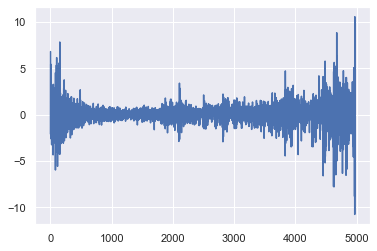

In [24]:
dif_qqq = (df['QQQ'] - df['QQQ'].shift()).iloc[1:]
dif_qqq.plot()

### Looking again at ADF and KPSS tests:

In [25]:
adf_dif_spy = adfuller(dif_spy)
adf_dif_pval_spy = adf_dif_spy[1]

if adf_dif_pval_spy < 0.05:
    print('We can reject the Null Hypothesis of non-stationarity')
else:
    print('We cannot reject the Null Hypothesis of non-stationarity')


We can reject the Null Hypothesis of non-stationarity


In [26]:
kpss_dif_spy = kpss(dif_spy)
kpss_dif_pval_spy = kpss_dif_spy[1]

if kpss_dif_pval_spy <= 0.05:
    print('We can reject the Null Hypothesis of stationarity')
else:
    print('We cannot reject the Null Hypothesis of stationarity')

We can reject the Null Hypothesis of stationarity


In [27]:
adf_dif_iwm = adfuller(dif_iwm)
adf_dif_pval_iwm = adf_dif_iwm[1]

if adf_dif_pval_iwm < 0.05:
    print('We can reject the Null Hypothesis of non-stationarity')
else:
    print('We cannot reject the Null Hypothesis of non-stationarity')

We can reject the Null Hypothesis of non-stationarity


In [28]:
kpss_dif_iwm = kpss(dif_iwm)
kpss_dif_pval_iwm = kpss_dif_iwm[1]

if kpss_dif_pval_iwm < 0.05:
    print('We can reject the Null Hypothesis of stationarity')
else:
    print('We cannot reject the Null Hypothesis of stationarity')

We cannot reject the Null Hypothesis of stationarity


In [29]:
adf_dif_qqq = adfuller(dif_qqq)
adf_dif_pval_qqq = adf_dif_qqq[1]

if adf_dif_pval_qqq < 0.05:
    print('We can reject the Null Hypothesis of non-stationarity')
else:
    print('We cannot reject the Null Hypothesis of non-stationarity')

We can reject the Null Hypothesis of non-stationarity


In [30]:
kpss_dif_qqq = kpss(dif_qqq)
kpss_dif_pval_qqq = kpss_dif_qqq[1]

if kpss_dif_pval_qqq < 0.05:
    print('We can reject the Null Hypothesis of stationarity')
else:
    print('We cannot reject the Null Hypothesis of stationarity')

We can reject the Null Hypothesis of stationarity


## 1 F

It seems that we can’t reject non-stationarity using both test. In this case, it could means that one difference to solve the non-stationarity is not enough and it is likely that we will need to difference for more than one period.

## 1 G

Trend stationary means that the time series will revert to the mean. In other words, it means that it only has white noise in the variation, and that, in expectation, the mean won't change over time. This is the same to saying that the series will converge again towards the trend over time.

# Q2: Random Walk

## 2A

In [31]:
import random
options = [-1,1]
sample_1 = random.choices(options, k = 1000)

## 2B

In [32]:
series = pd.Series(sample_1)
series

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
995   -1
996    1
997    1
998   -1
999   -1
Length: 1000, dtype: int64

In [33]:
cumsum = series.cumsum()
cumsum

0     -1
1     -2
2     -3
3     -4
4     -5
      ..
995    4
996    5
997    6
998    5
999    4
Length: 1000, dtype: int64

## 2C

The first series is only showing a Bernoulli distribution. It is not a random walk since it can only take the value of -1 or 1. However, the second time series is a random walk, and is a random walk generated by a Bernoulli distribution.

## 2D

<AxesSubplot:>

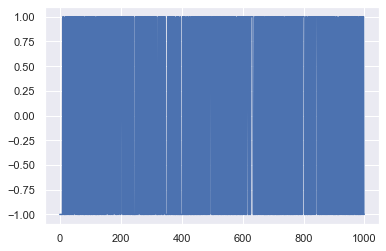

In [34]:
series.plot()

<AxesSubplot:>

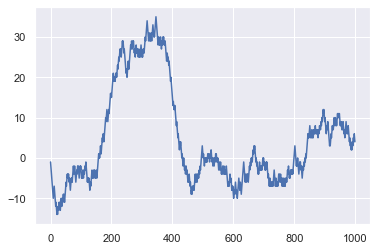

In [35]:
cumsum.plot()

## 2E

We know that a random walk is not stationary since it does not revert to the mean. This can be, first of all, tested visually in the time series: there is not any reversion to a mean over time. In addition to this visual examination, we can also provide evidence for this by computing the coefficients of ADF test and KPSS test, as follows:

### ADF

In [36]:
adf_test(cumsum)

Results of Dickey-Fuller Test:
Test Statistic                  -1.623220
p-value                          0.471041
#Lags Used                      11.000000
Number of Observations Used    988.000000
Critical Value (1%)             -3.436986
Critical Value (5%)             -2.864470
Critical Value (10%)            -2.568330
dtype: float64


In [37]:
adf_cumsum = adfuller(cumsum)
adf_pval_cumsum = adf_cumsum[1]

if adf_pval_cumsum < 0.05:
    print('We can reject the Null Hypothesis of non-stationarity')
else:
    print('We cannot reject the Null Hypothesis of non-stationarity')

We cannot reject the Null Hypothesis of non-stationarity


### KPSS

In [38]:
kpss_test(cumsum)

Results of KPSS Test:
Test Statistic            0.593714
p-value                   0.023208
Lags Used                22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [39]:
kpss_cumsum = kpss(cumsum)
kpss_pval_cumsum = kpss_cumsum[1]

if kpss_pval_cumsum <= 0.05:
    print('We can reject the Null Hypothesis of stationarity')
else:
    print('We cannot reject the Null Hypothesis of stationarity')

We can reject the Null Hypothesis of stationarity


## 2F

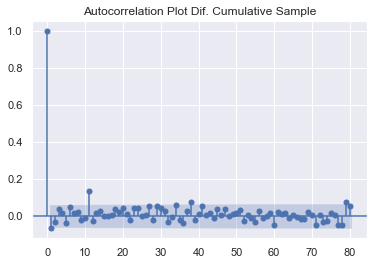

In [40]:
dif_cumsum = (cumsum - cumsum.shift()).iloc[1:]
acf_plot_cumsample = plot_acf(dif_cumsum, lags=80, title='Autocorrelation Plot Dif. Cumulative Sample')

## 2G

The plot above is showing us that, after the diference, there is not autocorrelation in the time series anymore. We can se that there is the perfect autocorrelation for the same period. Also, there is a significance level of correlation with respect to time ~11, which is something we can explore. However, the conclusion is that we can state that autocorrelation is not present in the time series.

## 2H

Random walk cannot be predicted. The reason is simple because it does not revert to a mean; it has no mean level, which
means that the time series just wanders around.